# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import random

random.seed(42)
np.random.seed(42)

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

**Фиксация зерна выполняется для воспроизводимости результатов**

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [3]:
df_test.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
521,Tata Tigor 1.2 Revotron XT,2018,450000,35000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
737,Mahindra NuvoSport N8 AMT,2016,650000,50000,Diesel,Individual,Automatic,First Owner,17.45 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0
740,Toyota Innova 2.5 GX 7 STR,2012,520000,162000,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
660,Hyundai Sonata 2.0L CRDi MT,2009,330000,180000,Diesel,Individual,Manual,First Owner,13.6 kmpl,1991 CC,142 bhp,"33@ 2,000-2,680(kgm@ rpm)",5.0
411,Hyundai i20 1.4 CRDi Era,2010,350000,90000,Diesel,Individual,Manual,Second Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
678,Maruti Vitara Brezza ZDi Plus,2019,900000,40000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
626,Maruti 800 AC,2006,50000,40000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
513,Hyundai Grand i10 Magna,2016,400000,80000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
859,Maruti Wagon R VXI BS IV with ABS,2010,215000,120600,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
136,Mahindra Verito 1.5 D2 BSIV,2012,140000,120000,Diesel,Individual,Manual,Second Owner,21.03 kmpl,1461 CC,65 bhp,160Nm@ 2000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [4]:
pd.concat([df_train.head(5), df_train.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [5]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [6]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [7]:
df_train.duplicated(subset=df_train.columns.difference(['selling_price'])).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [8]:
df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']))]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [9]:
df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']),
                         keep='first',
                         inplace=True)

In [10]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [11]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [12]:
for i in ['mileage', 'engine', 'max_power']:
    df_train[i] = df_train[i].str.extract(r'(\d+[.,\d]+)').replace('', None).astype('float')
    df_test[i] = df_test[i].str.extract(r'(\d+[.,\d]+)').replace('', None).astype('float')
    
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [13]:
cat_features_mask = (df_train.dtypes == "object").values
train_real = df_train[df_train.columns[~cat_features_mask]]
test_real = df_test[df_test.columns[~cat_features_mask]]

cat_features_list = df_train.columns[cat_features_mask].to_list()

In [14]:
from sklearn import impute

na_replacer = impute.SimpleImputer(strategy="median")
na_replacer_fitted = na_replacer.fit(train_real)

train_no_na_real = pd.DataFrame(data=na_replacer_fitted.transform(train_real),
                                columns=train_real.columns)

test_no_na_real = pd.DataFrame(data=na_replacer_fitted.transform(test_real),
                               columns=test_real.columns)

train_cat = df_train.loc[:, cat_features_list].fillna("").reset_index(drop=True)
test_cat = df_test.loc[:, cat_features_list].fillna("").reset_index(drop=True)

df_train_no_mis = pd.concat([train_no_na_real, train_cat], axis=1)
df_test_no_mis = pd.concat([test_no_na_real, test_cat], axis=1)

In [15]:
##check
assert df_train_no_mis.isna().sum().sum() == 0
assert df_test_no_mis.isna().sum().sum() == 0


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

**Вероятно, если не применить кодирование к переменной seats, то с увеличением кол-ва сидений этот признак будет вносить больший вклад в целевую переменную. А не всегда минивен с 6 сиденьями будет стоить дороже спортивного купе.**

In [16]:
df_train_no_mis[['engine', 'seats']] = df_train_no_mis[['engine', 'seats']].astype('int')

df_test_no_mis[['engine', 'seats']] = df_test_no_mis[['engine', 'seats']].astype('int')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

<Figure size 2000x1200 with 0 Axes>

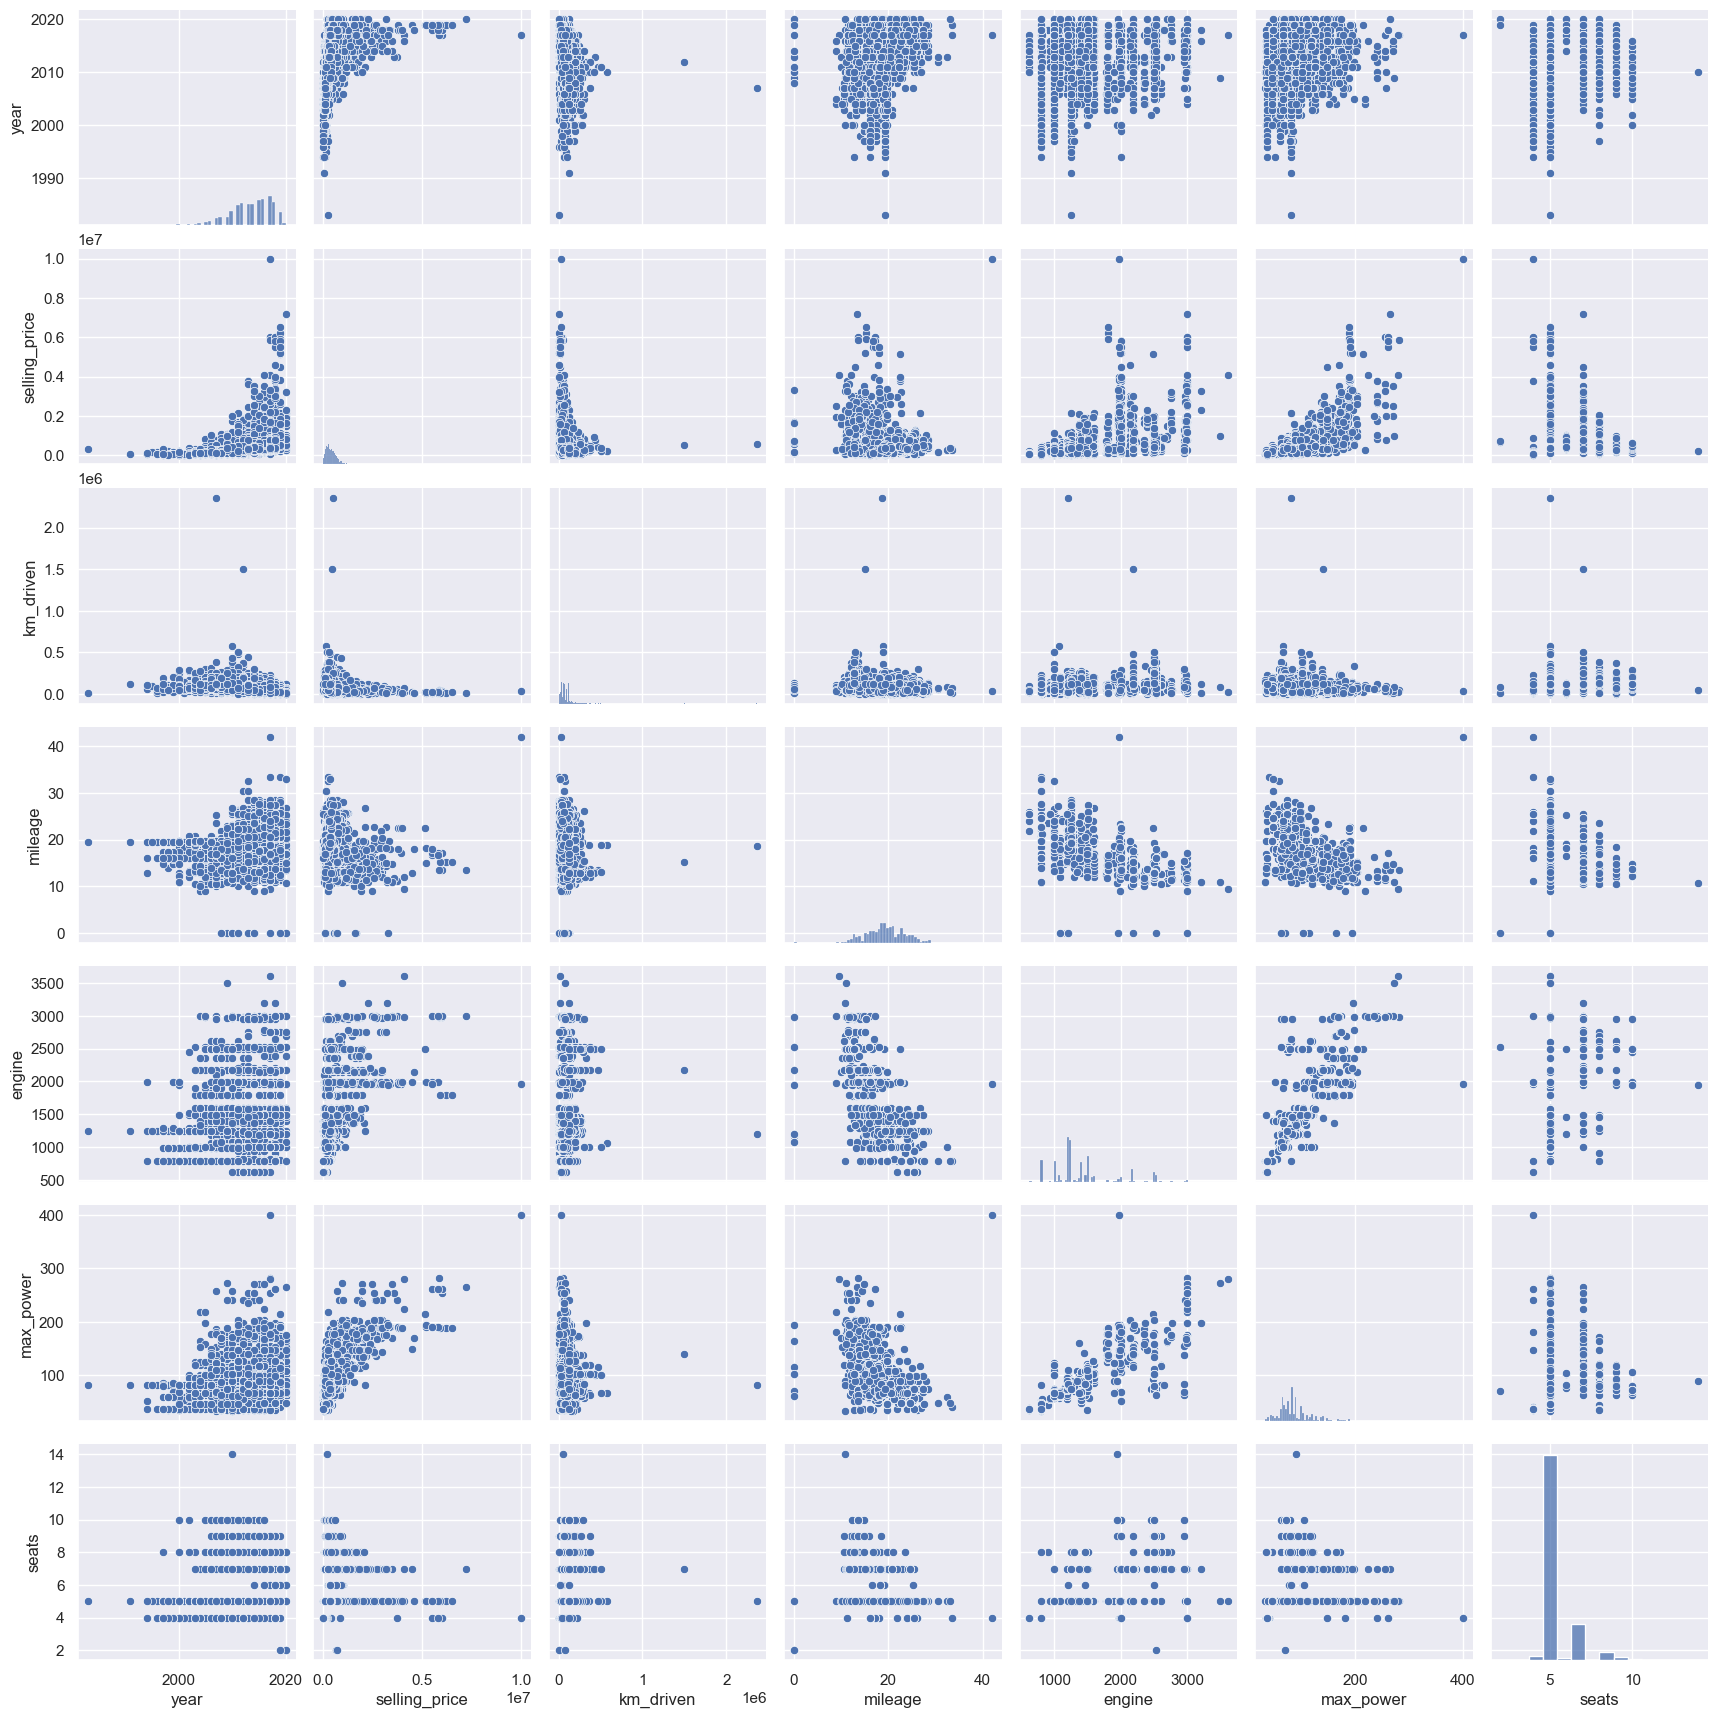

In [17]:
plt.figure(figsize=(20, 12))
sns.pairplot(df_train_no_mis)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

### Ответы:
* визуально наблюдается нелинейная связь предикторов с целевой переменной. Возможно стоит попробовать добавить полиномы некоторых признаков в дальнейшем
* явной корреляции в большинстве пар признаков также не наблюдается

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

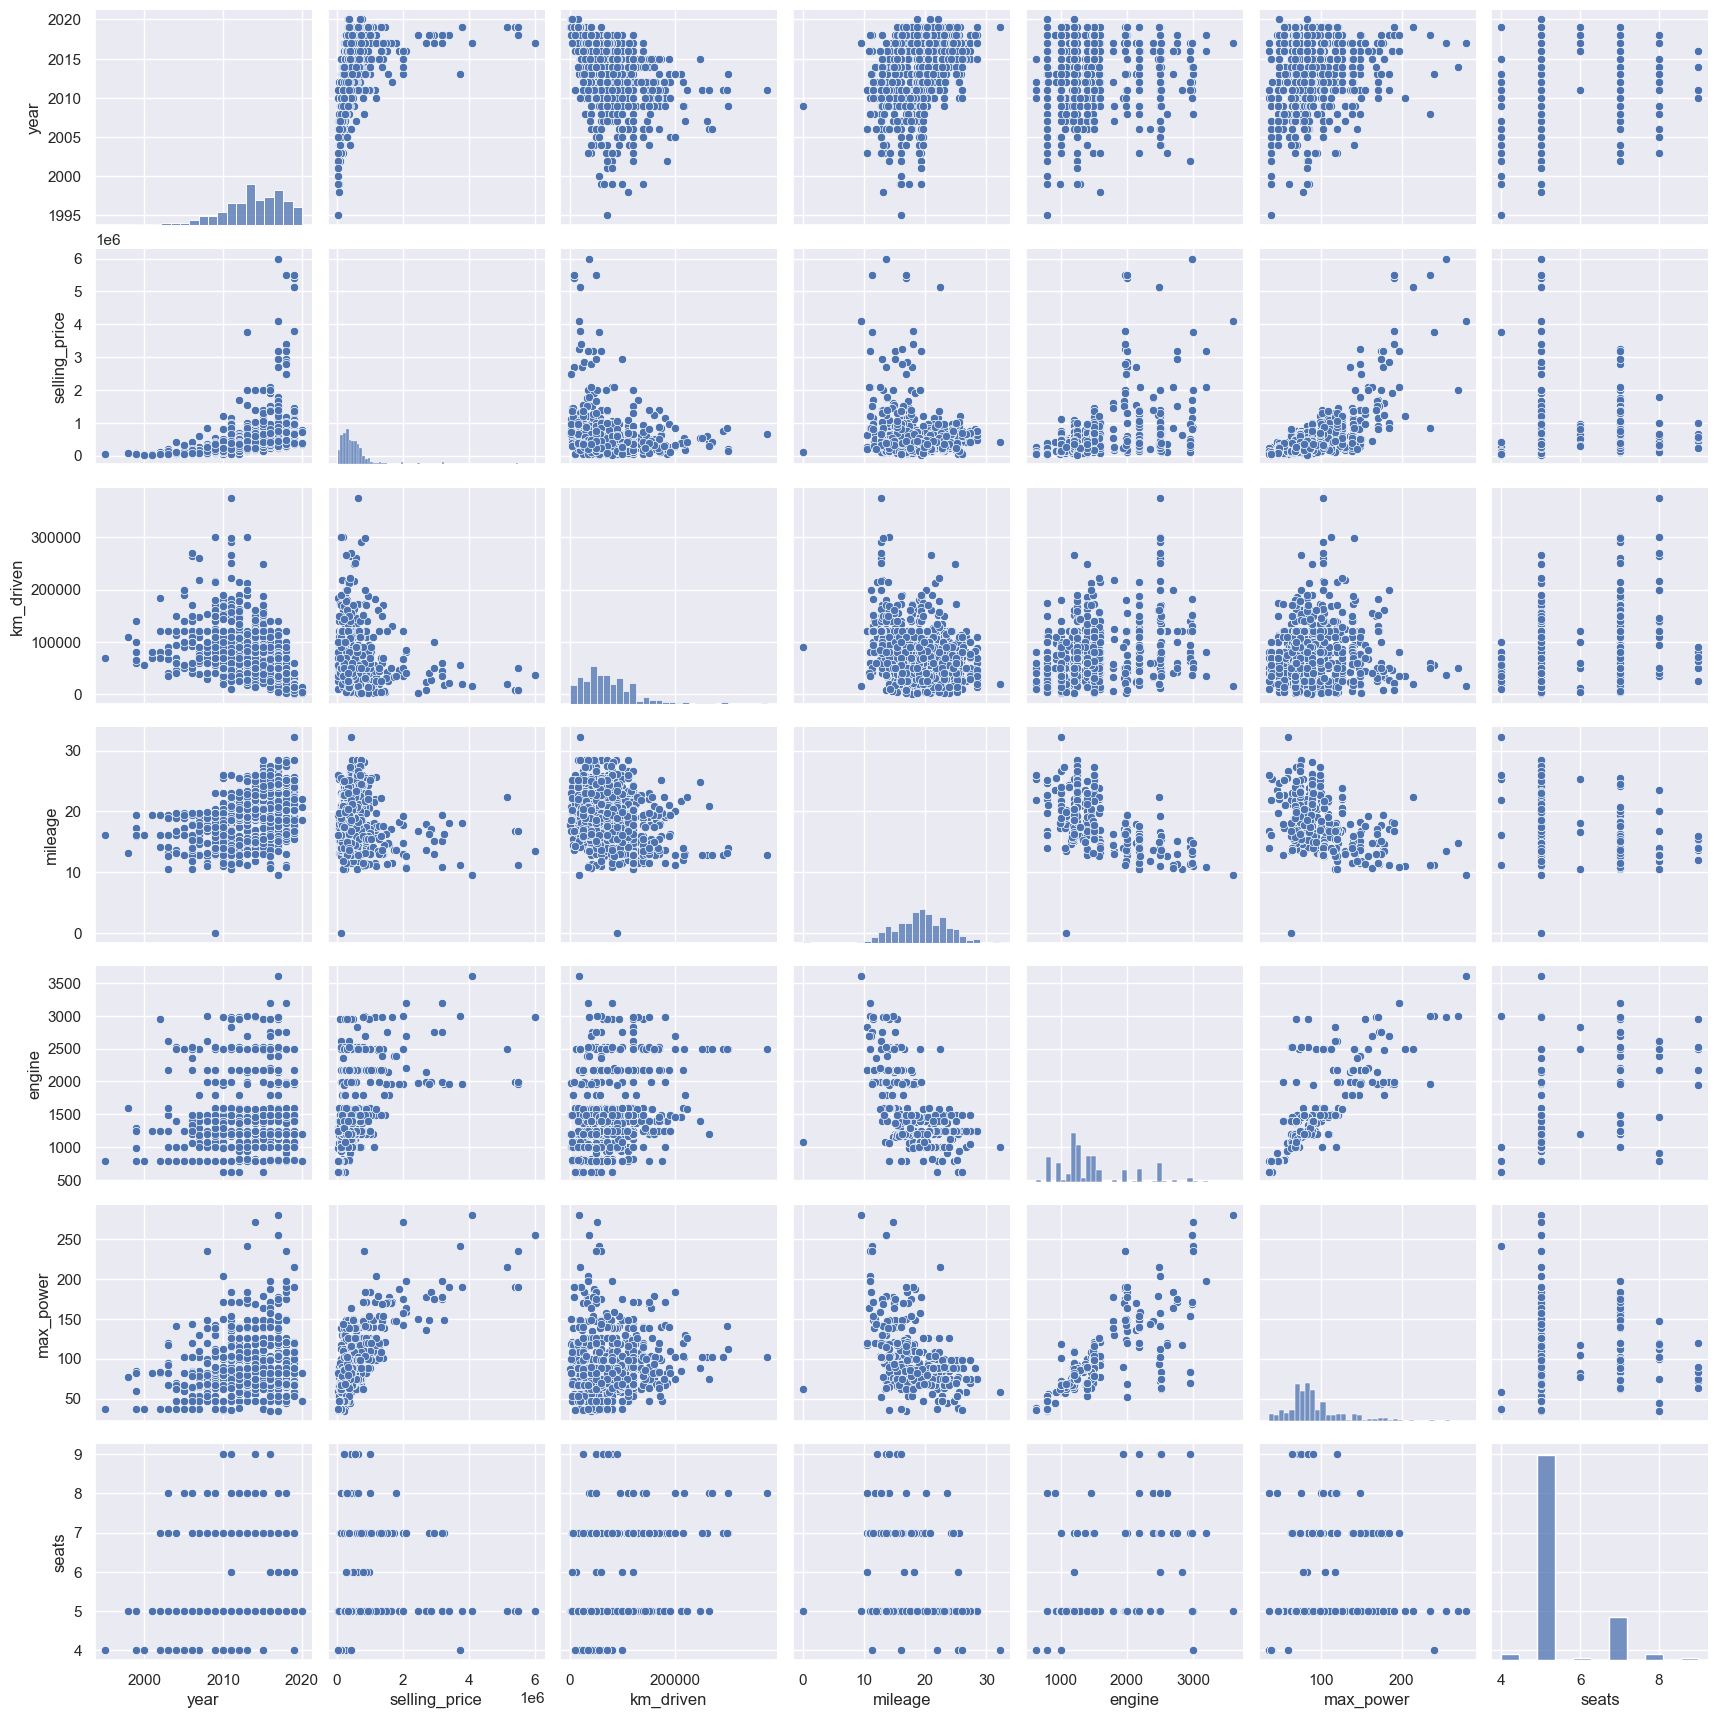

In [18]:
sns.pairplot(df_test_no_mis)

**Визуально совокупности попарных диагарамм рассеяния похожи**

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

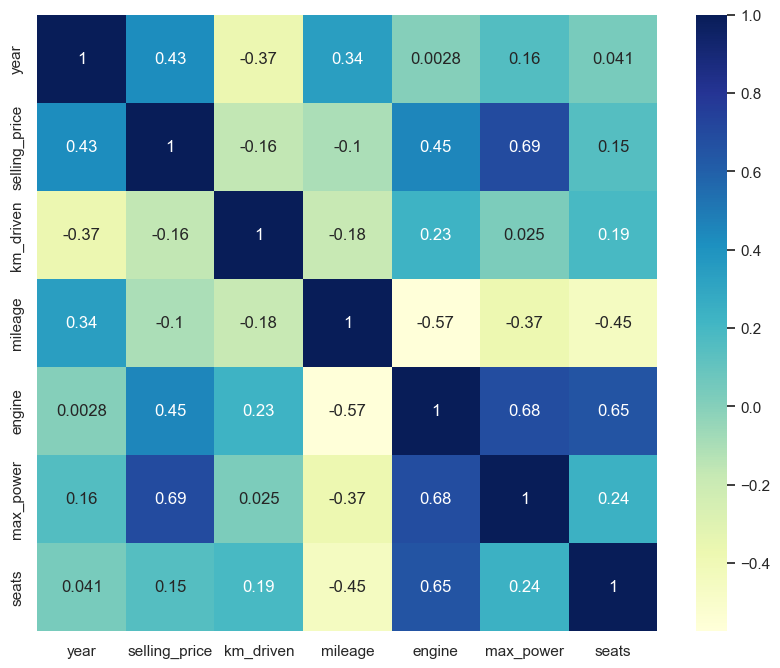

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_no_mis.corr(),
            cmap="YlGnBu",
            annot=True,
           )

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

### Ответы
* В данной матрице это "year" и "engine" с коэффициентом корреляции Пирсона 0.0028
* В данной матрице это "selling_price" и "max_power" с коэффициентом 0.693531
* Коэффициент корреляции между "year" и "km_driven" равен -0.368966. Это означает, что, основываясь на данных, мы не можем утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Коэффициент корреляции слабый и близок к 0, что говорит о низкой линейной зависимости между этими 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

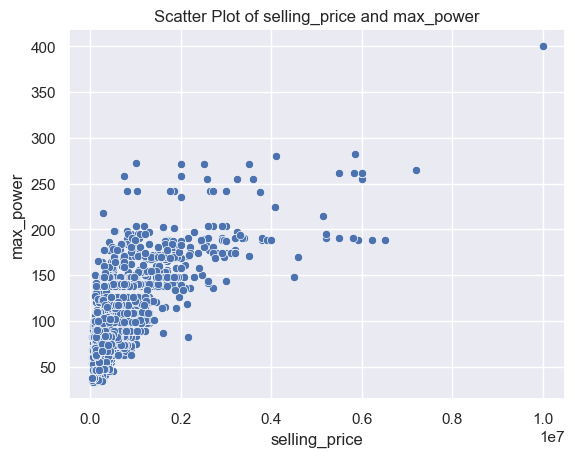

In [20]:
sns.scatterplot(data = df_train_no_mis,
                x = 'selling_price',
                y = 'max_power')

plt.title('Scatter Plot of selling_price and max_power')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [21]:
real_features_list = df_train_no_mis.columns.difference(cat_features_list + ['selling_price'])

y_train = df_train_no_mis['selling_price']
X_train = df_train_no_mis[real_features_list]

In [22]:
assert X_train.shape == (5840, 6)

In [23]:
y_test = df_test_no_mis['selling_price']
X_test = df_test_no_mis[real_features_list]

In [24]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

print('r2', r2_score(y_test, model.predict(X_test)))
print('mse', MSE(y_test, model.predict(X_test)))

r2 0.5946576472667295
mse 233002359160.7547


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [26]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
normalizer.fit(X_train)

X_train_standarted = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_standarted = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

model.fit(X_train_standarted, y_train)

print('r2', r2_score(y_test, model.predict(X_test_standarted)))
print('mse', MSE(y_test, model.predict(X_test_standarted)))

r2 0.5946576472666549
mse 233002359160.79758


In [27]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_scaled = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

model.fit(X_train_scaled, y_train)

print('r2', r2_score(y_test, model.predict(X_test_scaled)))
print('mse', MSE(y_test, model.predict(X_test_scaled)))

r2 0.594657647266655
mse 233002359160.79755


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [28]:
model.coef_

array([  364045.93315038, -1731699.98407503,  3773699.57816339,
         308961.1984847 ,  -270712.741275  ,  1375525.78594465])

In [29]:
print(f"Наиболее информативным в предсказании цены оказался признак: {X_train.columns[np.where(model.coef_ == max([abs(i) for i in model.coef_]))][0]}")

Наиболее информативным в предсказании цены оказался признак: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [30]:
from sklearn.linear_model import Lasso

model_l1 = Lasso()

model_l1.fit(X_train_standarted, y_train)

print('r2', r2_score(y_test, model_l1.predict(X_test_standarted)))
print('mse', MSE(y_test, model_l1.predict(X_test_standarted)))

r2 0.5946564897239697
mse 233003024549.38745


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [31]:
model_l1.coef_

array([ 59320.35795212, -44065.06708455, 324497.64705663,  29317.32927402,
       -22156.40793744, 152247.14817989])

Параметр $\alpha$ по умолчанию равен 1, возможно причина в этом, так как штраф за большие веса, это 1 модуль суммы весов

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [32]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring = 'neg_mean_squared_error',
                               cv = 10)

lasso_regressor.fit(X_train_standarted, y_train)

print('r2', r2_score(y_test, lasso_regressor.predict(X_test_standarted)))
print('mse', MSE(y_test, lasso_regressor.predict(X_test_standarted)))

r2 0.5945417256835974
mse 233068994196.95386


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [33]:
print(f"Грид-сёрчу пришлось обучать {len(parameters['alpha']) * lasso_regressor.get_params()['cv']} моделей")

Грид-сёрчу пришлось обучать 70 моделей


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [34]:
print(lasso_regressor.best_params_)


{'alpha': 100}


In [35]:
lasso_regressor.best_estimator_.coef_

array([ 58862.7458542 , -43954.86748393, 324575.7777449 ,  29134.00561971,
       -21881.19858351, 152229.06270484])

**Веса не занулились так как L2 регулязация как правило их не зануляет**

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [36]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {"max_iter": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}

elastic_regressor = GridSearchCV(elastic,
                               parameters,
                               scoring = 'neg_mean_squared_error',
                               cv = 10)

elastic_regressor.fit(X_train_standarted, y_train)

print('r2', r2_score(y_test, elastic_regressor.predict(X_test_standarted)))
print('mse', MSE(y_test, elastic_regressor.predict(X_test_standarted)))

r2 0.5927123968418697
mse 234120544652.83197


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [37]:
print(elastic_regressor.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 10}


In [38]:
elastic_regressor.best_estimator_.coef_

array([ 69686.67333161, -44479.95773933, 315419.59332873,  28428.92483255,
       -26777.74897291, 152461.19404095])

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [39]:
X_train_cat = df_train_no_mis.drop(["name", "selling_price"], axis=1)
X_test_cat = df_test_no_mis.drop(["name", "selling_price"], axis=1)

In [40]:
assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [41]:
cat_columns = X_train_cat.columns[(X_train_cat.dtypes == "object").values].to_list() + ['seats']

In [42]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
ohe.fit(X_train_cat.loc[:, cat_columns])

result = ohe.transform(X_train_cat.loc[:,cat_columns])

X_train_categorical_encoded = pd.DataFrame(result, columns=ohe.get_feature_names_out())

result_test = ohe.transform(X_test_cat.loc[:,cat_columns])

X_test_categorical_encoded = pd.DataFrame(result_test, columns=ohe.get_feature_names_out())

X_train_real = X_train_cat.drop(cat_columns, axis=1)
X_test_real = X_test_cat.drop(cat_columns, axis=1)

normalizer = StandardScaler()
normalizer.fit(X_train_real)

X_train_real_standarted = pd.DataFrame(normalizer.transform(X_train_real), columns=X_train_real.columns)
X_test_real_standarted = pd.DataFrame(normalizer.transform(X_test_real), columns=X_test_real.columns)

X_train = X_train_real_standarted.join(X_train_categorical_encoded)
X_test = X_test_real_standarted.join(X_test_categorical_encoded)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1] + [i for i in range(100)]}
ridge_regressor = GridSearchCV(ridge,
                               parameters,
                               scoring = 'r2',
                               cv = 10)

ridge_regressor.fit(X_train, y_train)

print('r2', r2_score(y_test, ridge_regressor.predict(X_test)))
print('mse', MSE(y_test, ridge_regressor.predict(X_test)))

r2 0.644768659273611
mse 204197118507.25827


In [44]:
print(f'После добавления категориальный признаков, метрика r2 увеличилась ~ на {round(r2_score(y_test, ridge_regressor.predict(X_test)) - r2_score(y_test, elastic_regressor.predict(X_test_standarted)), 4)}')

После добавления категориальный признаков, метрика r2 увеличилась ~ на 0.0521


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

**Добавим бренд**

In [45]:
y_train = df_train_no_mis['selling_price']
y_test = df_test_no_mis['selling_price']

df_train_no_mis.drop('selling_price', axis=1, inplace=True)
df_test_no_mis.drop('selling_price', axis=1, inplace=True)

In [46]:
df_train_no_mis['Brand'] = df_train_no_mis.name.str.split(' ').apply(lambda x: x[0] if len(x) != 0 else '')
df_test_no_mis['Brand'] = df_test_no_mis.name.str.split(' ').apply(lambda x: x[0] if len(x) != 0 else '')

**Добавим полином 3 степени от цены (определен итеративно in range(10) по метрике r2)**

In [47]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=3,
                          interaction_only=False,
                          include_bias=False)

train_year_poly = pd.DataFrame(poly.fit_transform(df_train_no_mis['year'].values.reshape(-1, 1))).astype(int)
train_poly = df_train_no_mis.drop('year', axis=1)
train_poly = pd.concat([train_poly, train_year_poly], axis=1)


test_year_poly = pd.DataFrame(poly.fit_transform(df_test_no_mis['year'].values.reshape(-1, 1))).astype(int)
test_poly = df_test_no_mis.drop('year', axis=1)
test_poly = pd.concat([test_poly, test_year_poly], axis=1)

test_poly.columns = test_poly.columns.astype("str")
train_poly.columns = train_poly.columns.astype("str")

real_mask = (train_poly.dtypes != 'object').values

In [48]:
X_train_real = train_poly.iloc[:, real_mask]
X_test_real = test_poly.iloc[:, real_mask]

X_train_cat = train_poly.iloc[:, ~real_mask]
X_test_cat = test_poly.iloc[:, ~real_mask]

In [49]:
model = LinearRegression()

model.fit(X_train_real , y_train)

print('r2_test', r2_score(y_test, model.predict(X_test_real)))
print('r2_train', r2_score(y_train, model.predict(X_train_real)))

r2_test 0.6200534243886262
r2_train 0.6186422891149185


Стандартизируем признаки

In [50]:
X_train_real.columns

Index(['km_driven', 'mileage', 'engine', 'max_power', 'seats', '0', '1', '2'], dtype='object')

In [51]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
normalizer.fit(X_train_real)

X_train_poly_std_real = pd.DataFrame(data=normalizer.transform(X_train_real),
                                     columns=X_train_real.columns)
X_test_poly_std_real = pd.DataFrame(data=normalizer.transform(X_test_real),
                                    columns=X_test_real.columns)


model = LinearRegression()

model.fit(X_train_poly_std_real , y_train)

print('r2_test', r2_score(y_test, model.predict(X_test_poly_std_real)))
print('r2_train', r2_score(y_train, model.predict(X_train_poly_std_real)))

r2_test 0.6200534244095893
r2_train 0.6186422891127473


**Добавим регуляризацию**

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1] + [i for i in range(100)]}
ridge_regressor = GridSearchCV(ridge,
                               parameters,
                               scoring = 'r2',
                               cv = 10)

ridge_regressor.fit(X_train_poly_std_real, y_train)

print('r2_test', r2_score(y_test, ridge_regressor.predict(X_test_poly_std_real)))
print('r2_train', r2_score(y_train, ridge_regressor.predict(X_train_poly_std_real)))

r2_test 0.6171706459024107
r2_train 0.6171152211135009


**Добавляем категориальные признаки**

In [53]:
X_train_cat.drop('name', axis=1, inplace=True)
X_test_cat.drop('name', axis=1, inplace=True)

In [54]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
ohe.fit(X_train_cat)

X_train_cat_coded = ohe.transform(X_train_cat)
X_train_cat_coded = pd.DataFrame(data=X_train_cat_coded,
                                 columns=ohe.get_feature_names_out()).astype(int)

X_test_cat_coded = ohe.transform(X_test_cat)
X_test_cat_coded = pd.DataFrame(data=X_test_cat_coded,
                                columns=ohe.get_feature_names_out()).astype(int)

In [55]:
X_train_final = pd.concat([X_train_poly_std_real, X_train_cat_coded], axis=1)
X_test_final = pd.concat([X_test_poly_std_real, X_test_cat_coded], axis=1)

X_train_final.columns = X_train_final.columns.astype('str')
X_test_final.columns = X_test_final.columns.astype('str')

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]}
lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring = 'r2',
                               cv = 10)

lasso_regressor.fit(X_train_final, y_train)

print('r2_test', r2_score(y_test, lasso_regressor.predict(X_test_final)))
print('r2_train', r2_score(y_train, lasso_regressor.predict(X_train_final)),'\n')


print('mse_test', MSE(y_test, lasso_regressor.predict(X_test_final)))
print('mse_train', MSE(y_train, lasso_regressor.predict(X_train_final)))

print('best_params', lasso_regressor.best_params_ )

r2_test 0.7814889715179114
r2_train 0.7629164330215477 

mse_test 125606378893.43
mse_train 67957239690.66427
best_params {'alpha': 0.0001}


In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]}
ridge_regressor = GridSearchCV(ridge,
                               parameters,
                               scoring = 'r2',
                               cv = 10)

ridge_regressor.fit(X_train_final, y_train)

print('r2_test', r2_score(y_test, ridge_regressor.predict(X_test_final)))
print('r2_train', r2_score(y_train, ridge_regressor.predict(X_train_final)),'\n')


print('mse_test', MSE(y_test, ridge_regressor.predict(X_test_final)))
print('mse_train', MSE(y_train, ridge_regressor.predict(X_train_final)))

print('best_params', ridge_regressor.best_params_ )

r2_test 0.7899742432822014
r2_train 0.7800161453614767 

mse_test 120728802380.96346
mse_train 63055806559.14916
best_params {'alpha': 0.0001}


**После Feature Engineering удалось повысить r2 на ~ 0.14!**

Лучшая модель  c L2 регуляризацией, она и поедет в прод.

In [64]:
import pickle
import pathlib

models_folder = pathlib.Path('.').resolve().parent / 'models'

pickle.dump(ridge_regressor, (models_folder / 'ridge_regressor.pkl').open('wb'))
pickle.dump(ohe, (models_folder /'ohe.pkl').open('wb'))
pickle.dump(normalizer, (models_folder / 'normalizer.pkl').open('wb'))
pickle.dump(na_replacer_fitted, (models_folder / 'na_imputer.pkl').open('wb'))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [63]:
def business_metrics(y_true, y_pred):
    return (((ypred - y_true) / ypred) <= 0.1).sum() / len(ypred)

ypred = ridge_regressor.predict(X_test_final)
print(f"Бизнес метрика - {business_metrics(np.array(y_test), ypred)}")

Бизнес метрика - 0.597


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [82]:
pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv').loc[[1,2]].to_json()

'{"name":{"1":"Tata Nexon 1.5 Revotorq XE","2":"Honda Civic 1.8 S AT"},"year":{"1":2017,"2":2007},"selling_price":{"1":665000,"2":175000},"km_driven":{"1":25000,"2":218463},"fuel":{"1":"Diesel","2":"Petrol"},"seller_type":{"1":"Individual","2":"Individual"},"transmission":{"1":"Manual","2":"Automatic"},"owner":{"1":"First Owner","2":"First Owner"},"mileage":{"1":"21.5 kmpl","2":"12.9 kmpl"},"engine":{"1":"1497 CC","2":"1799 CC"},"max_power":{"1":"108.5 bhp","2":"130 bhp"},"torque":{"1":"260Nm@ 1500-2750rpm","2":"172Nm@ 4300rpm"},"seats":{"1":5.0,"2":5.0}}'

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link